In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

In [1]:
def gauss(r, sig):
    return 1./np.sqrt(2*np.pi*sig) * np.exp(-0.5*(r/sig)**2)

## Set coordinates and image sizes

In [3]:
psf_cell_size = 16./3600.
psf_n_pix = 2048

HI_cell_size = psf_cell_size*8.
HI_n_pix = 256

x_psf = psf_cell_size * np.arange(-psf_n_pix//2, psf_n_pix//2, 1)
xx_psf, yy_psf = np.meshgrid(x_psf, x_psf)
rr_psf = np.sqrt(xx_psf**2 + yy_psf**2)

x_HI = HI_cell_size * np.arange(-HI_n_pix//2, HI_n_pix//2, 1)
xx_HI, yy_HI = np.meshgrid(x_HI, x_HI)
rr_HI = np.sqrt(xx_HI**2 + yy_HI**2)

## Create PSF 

In [252]:
psf_width = 10
# psf_width = 3
# psf_width = 1

psf_map = np.sinc(psf_width*rr_psf)
psf_map = psf_map*(psf_width**2/20)

## Generate HI field map (or gaussian source)

In [254]:
field = True

HI_map = np.fft.fftshift(np.fft.irfft2(np.fft.rfft2(np.random.randn(HI_n_pix, HI_n_pix), 
                                    norm='ortho') * \
                       np.fft.rfft2(gauss(rr_HI, sig=3e-1), 
                                    norm='ortho'), 
                       norm='ortho'))


# Single gaussian source to test
if field == False:
    HI_map = np.fft.fftshift(np.fft.irfft2(np.fft.rfft2(np.where(np.linalg.norm([xx_HI-2, yy_HI-1], axis=0)<1e-2, 1, 0), 
                                        norm='ortho') * \
                           np.fft.rfft2(gauss(rr_HI, sig=5e-1), 
                                        norm='ortho'), 
                           norm='ortho'))

## Upsample the HI map to the PSF resolution

In [255]:
spline = RectBivariateSpline(x_HI, x_HI, HI_map)
HI_map2 = spline(x_psf, x_psf)

## Convolve the PSF with the upsampled HI map vis FFT

In [256]:
HI_map_conv = np.fft.fftshift(np.fft.irfft2(np.fft.rfft2(HI_map2, 
                                    norm='ortho') * \
                       np.fft.rfft2(psf_map, 
                                    norm='ortho'), 
                       norm='ortho'))

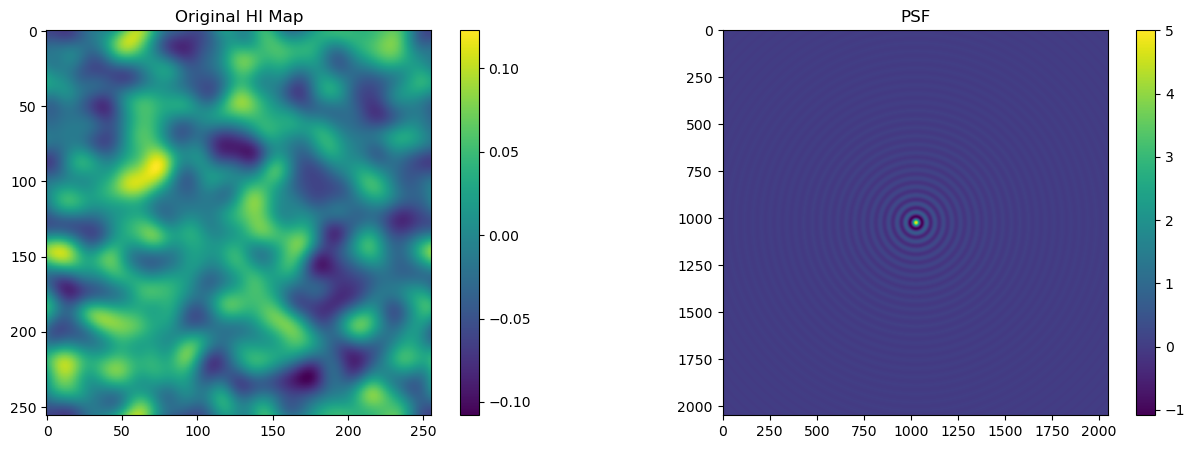

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

im = ax[0].imshow(HI_map)
ax[0].set_title('Original HI Map')
plt.colorbar(im)

im = ax[1].imshow(psf_map)
ax[1].set_title('PSF')
plt.colorbar(im)

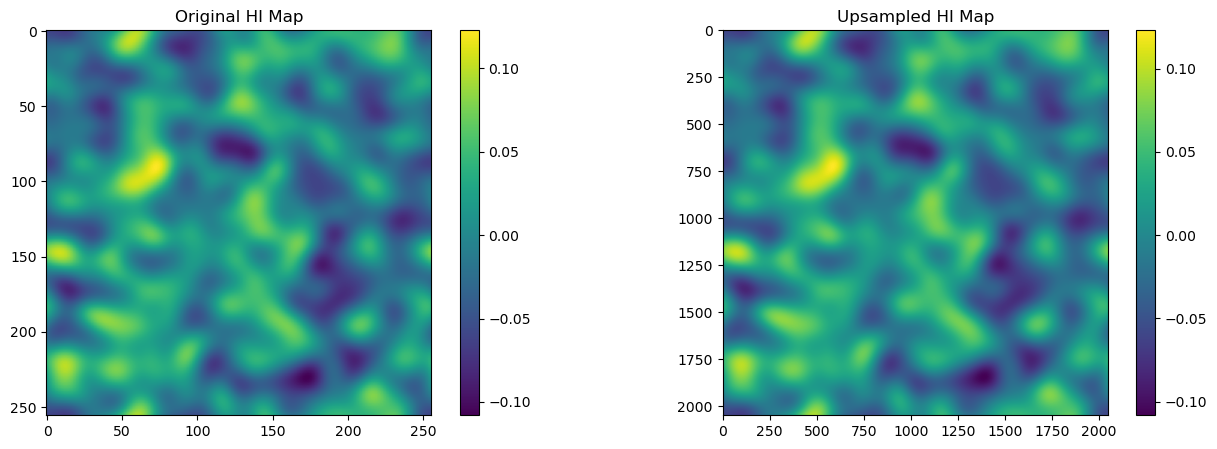

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

im = ax[0].imshow(HI_map)
ax[0].set_title('Original HI Map')
plt.colorbar(im)

im = ax[1].imshow(HI_map2)
ax[1].set_title('Upsampled HI Map')
plt.colorbar(im)

In [259]:
HI_map.mean(), HI_map2.mean()

(0.001410092823321019, 0.0014088592173773665)

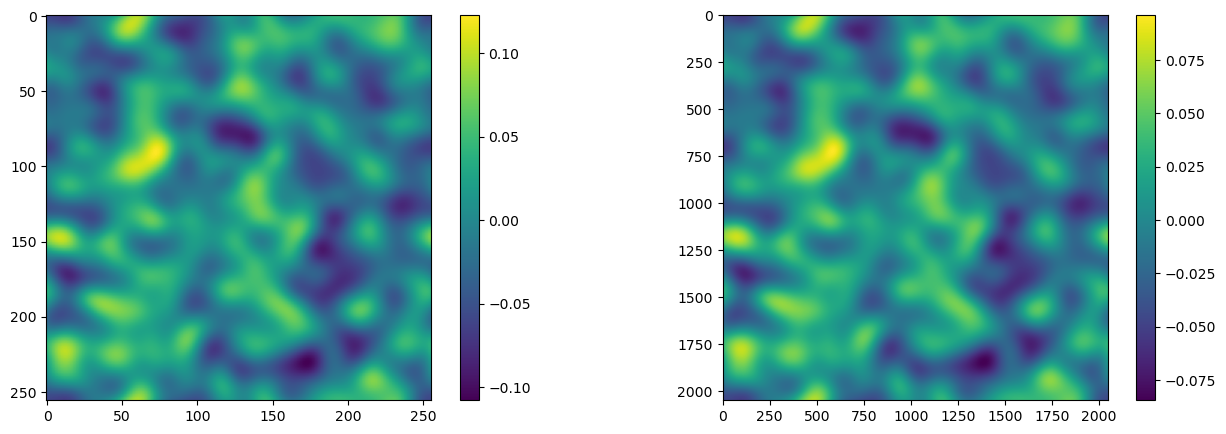

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

im = ax[0].imshow(HI_map)
plt.colorbar(im)

im = ax[1].imshow(HI_map_conv)
plt.colorbar(im)

In [261]:
HI_map.mean(), HI_map_conv.mean()

(0.001410092823321019, 0.000994686356139761)

In [232]:
HI_map.max()/HI_map_conv.max()

0.10510025704744652